In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

print("Done!")


2024-06-25 23:26:08.040884: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 23:26:08.044588: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 23:26:08.100987: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 23:26:10.064508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Done!


In [6]:
training_data=pd.read_csv("training_data_0.csv")
real_data=pd.read_csv("real_data_0.csv")

noisy_test=pd.read_csv("training_data_test.csv")
real_test=pd.read_csv("real_data_test.csv")

print("Done!")

Done!


In [7]:
all_trains=[]
all_real=[]

for i in range(16):
    exec(f'all_trains.append(training_data["channel_{i+1}"])')

for i in range(16):
    exec(f'all_real.append(real_data["channel_{i+1}"])')

all_trains=np.concatenate(all_trains)
all_real=np.concatenate(all_real)
print("Done!")

Done!


In [8]:
all_trains_test=[]
all_real_test=[]

for i in range(16):
    exec(f'all_trains_test.append(noisy_test["channel_{i+1}"])')

for i in range(16):
    exec(f'all_real_test.append(real_test["channel_{i+1}"])')

all_trains_test=np.concatenate(all_trains_test)
all_real_test=np.concatenate(all_real_test)
print("Done!")

Done!


In [9]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)
print("Done!")

Done!


In [10]:
seq_length = 100  # Length of the sequence
noisy = create_sequences(all_trains, seq_length)
real= create_sequences(all_real, seq_length)

noisy = noisy[..., np.newaxis]
real = real[..., np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(noisy, real, test_size=0.2, random_state=42)
print("Done!")

Done!


In [ ]:
# Step 3: Build and Train the RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),  # Adjust RNN shape as needed
    Dense(1)                                                        # Output layer
])

model.compile(optimizer='adam', loss='mse')  # Use appropriate loss function and optimizer
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))  # Adjust epochs as needed
model.save("model_1.keras")
print("Done!")


In [13]:
# Step 4: Evaluate and Visualize the Results
# Generate clean and noisy test waveforms
clean_test_waveform = all_real
noisy_test_waveform = all_trains
X_testwaveform = create_sequences(noisy_test_waveform, seq_length)
X_testwaveform= X_testwaveform[..., np.newaxis]

cleaned_test_waveform = model.predict(X_testwaveform)

# Flatten the cleaned waveform
cleaned_test_waveform = cleaned_test_waveform.flatten()

print("Done!")

14997/14997 ━━━━━━━━━━━━━━━━━━━━ 115s 8ms/step
Done!


In [3]:
noisy_signals = np.random.randn(1000, 100, 16)
print(len(noisy_signals))

1000


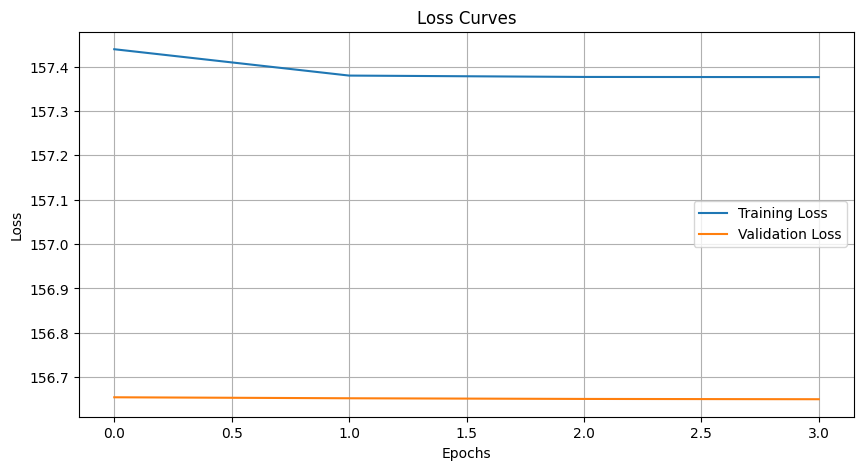

Done!


In [14]:
# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
print("Done!")